# Seminar 1: Classification
The motivation for this mini-project was to be able to classify whether a Li-ion battery is in a charging or discharging state. For this purpose we used the NASA Li-ion Battery Aging Dataset (https://data.nasa.gov/dataset/Li-ion-Battery-Aging-Datasets/uj5r-zjdb), which features data from 4 different Li-ion batteries. This study compares the performance of the Random Forest Classifier we discussed in class and Support Vector Machines, which is a very popular classifier due to being very lightweight during inference.

State of charge: available level of charge due to how many Lithiummetaloxides exist

# Data Preprocessing

In [3]:
import os
import pandas as pd
import matplotlib

In [4]:
nasa_battery = pd.read_csv('datasets/B0005.csv')

In [5]:
# convert date to numeric function
def convert_date_to_numeric(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name])
    df[column_name] = df[column_name].astype('int64') // 1e9
    return df

In [6]:
# clean data by converting to numeric
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
nasa_battery['type'] = label_encoder.fit_transform(nasa_battery['type'])
nasa_battery = nasa_battery.dropna(subset=['type'])
nasa_battery['type'] = nasa_battery['type'].astype(int)

In [7]:
# remove all columns with type 2
nasa_battery = nasa_battery[nasa_battery.type != 2]

In [8]:
# drop NA columns
nasa_battery = nasa_battery.dropna(axis=1, how='all')

In [9]:
nasa_battery

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,type,start_time,ambient_temp,Capacity
0,3.873017,-0.001201,24.655358,0.000,0.003,0.000,0,2008-04-02 13:08:17.000920,24,NaN
1,3.479394,-4.030268,24.666480,-4.036,1.570,2.532,0,2008-04-02 13:08:17.000920,24,NaN
2,4.000588,1.512731,24.675394,1.500,4.726,5.500,0,2008-04-02 13:08:17.000920,24,NaN
3,4.012395,1.509063,24.693865,1.500,4.742,8.344,0,2008-04-02 13:08:17.000920,24,NaN
4,4.019708,1.511318,24.705069,1.500,4.753,11.125,0,2008-04-02 13:08:17.000920,24,NaN
...,...,...,...,...,...,...,...,...,...,...
604797,0.236356,-0.003484,23.372048,0.000,0.003,0.000,0,2008-05-28 11:09:42.000045,24,NaN
604798,0.003365,-0.001496,23.369434,0.000,0.003,2.547,0,2008-05-28 11:09:42.000045,24,NaN
604799,4.985137,0.000506,23.386535,0.000,5.002,5.500,0,2008-05-28 11:09:42.000045,24,NaN
604800,4.984720,0.000442,23.386983,-0.002,5.002,8.312,0,2008-05-28 11:09:42.000045,24,NaN


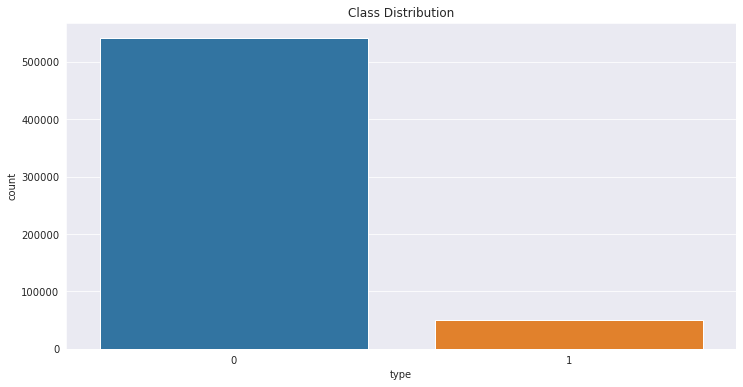

In [10]:
# plot class distributions (0 = charge, 1 = discharge)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.title("Class Distribution")
sns.countplot(x="type", data=nasa_battery)
plt.show()

In [11]:
# corr data
corr_data = nasa_battery.drop(['start_time'], axis=1)

In [12]:
# create train test split
from sklearn.model_selection import train_test_split

X = nasa_battery.drop(['type', 'start_time', ], axis=1)
y = nasa_battery['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
nasa_battery.describe()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,type,ambient_temp,Capacity
count,591458.000000,591458.000000,591458.000000,591458.000000,591458.000000,591458.000000,591458.000000,591458.0,50285.000000
mean,4.103945,0.369404,26.369701,0.634476,4.024930,4763.856934,0.085019,24.0,1.560345
std,0.213469,0.907558,2.772424,0.737029,1.208825,3147.859026,0.278910,0.0,0.182380
min,0.003365,-4.479660,23.214802,-4.468000,0.000000,0.000000,0.000000,24.0,1.287453
25%,4.089426,0.040636,24.488485,0.057000,4.240000,1928.175750,0.000000,24.0,1.386229
50%,4.205140,0.171961,25.479630,0.261000,4.305000,4467.515500,0.000000,24.0,1.538237
75%,4.205908,1.259778,27.348768,1.498000,4.656000,7503.824000,0.000000,24.0,1.746871
max,8.393141,1.531301,41.450232,1.998400,5.002000,10807.328000,1.000000,24.0,1.856487


In [14]:
# check types
X_train.dtypes

Voltage_measured        float64
Current_measured        float64
Temperature_measured    float64
Current_charge          float64
Voltage_charge          float64
Time                    float64
ambient_temp              int64
Capacity                float64
dtype: object

Features:

    Voltage_measured: Battery terminal voltage (Volts)
    Current_measured: Battery output current (Amps)
    Temperature_measured: Battery temperature (degree C)
    Current_charge: Current measured at load or charge (Amps) 
    Voltage_charge: Voltage measured at load or charge (Volts)
    Time: Time vector for the cycle (secs)
    Capacity: Battery capacity (Ahr) for discharge till 2.7V


In [15]:
# check for missing values
X_train.isnull().sum()

# convert non-numeric columns to numeric
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in X_train.columns:
    if X_train[column].dtype == type(object):
        X_train[column] = label_encoder.fit_transform(X_train[column])
        X_test[column] = label_encoder.transform(X_test[column])


# impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

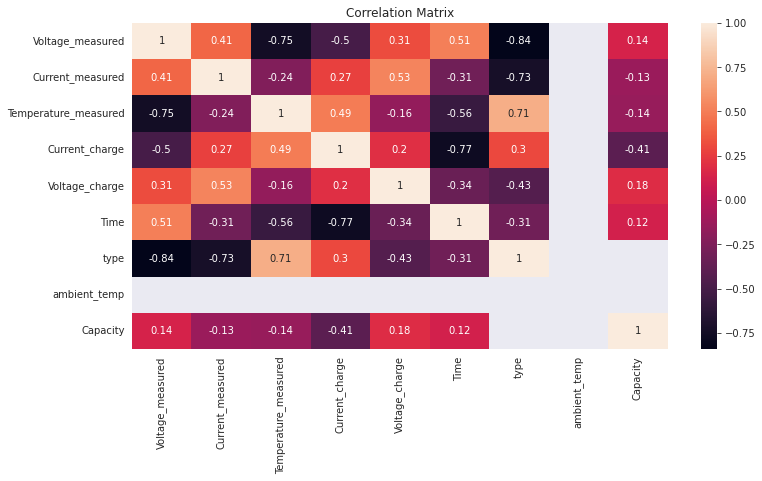

In [16]:
# plot correlation matrix of training data
test = pd.DataFrame(corr_data)
test.corr()
plt.figure(figsize=(12, 6))
plt.title("Correlation Matrix")
# use column names as labels
test.columns = corr_data.columns
sns.heatmap(test.corr(), annot=True)
plt.show()

Physical background (https://github.com/VaibhavBhujade/RUL-of-Lithium-Ion-Battery/tree/main):

- increasing capacity with increasing temperature
  (K. Amine, J. Liu and I. Belharouak, " High-temperature storage and cycling of C-LiFePO 4 /graphite Li-ion cells ", Electrochem. Commun., vol. 7, pp. 669-673, Jul. 2005.)


- higher discharge -> lower capacity 
  (J. Zhu, T. Tan, L. Wu and H. Yuan, "RUL Prediction of Lithium-Ion Battery Based on Improved DGWO-ELM Method in a Random Discharge Rates Environment," in IEEE Access, vol. 7, pp. 125176-125187, 2019, doi: 10.1109/ACCESS.2019.2936822. keywords: {Prediction algorithms;Discharges (electric);Lithium-ion batteries;Support vector machines;Employee welfare;Optimization;Lithium-ion batteries;RUL;random discharge;DGWO;DE;ELM}, )

Text(0, 0.5, 'capacity')

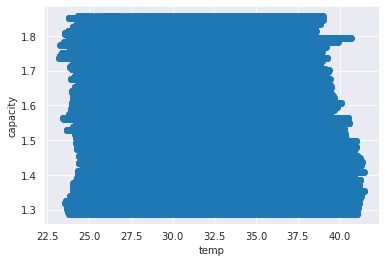

In [17]:
matplotlib.pyplot.scatter(corr_data["Temperature_measured"], corr_data["Capacity"])
matplotlib.pyplot.xlabel("temp")
matplotlib.pyplot.ylabel("capacity")
# though, plotted here, there seems to be no correlation between?


Text(0, 0.5, 'capacity')

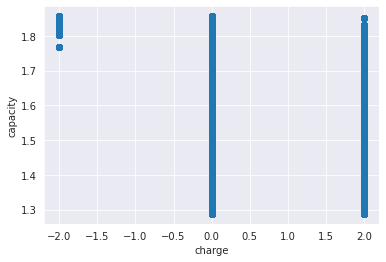

In [18]:
matplotlib.pyplot.scatter(corr_data["Current_charge"], corr_data["Capacity"])
matplotlib.pyplot.xlabel("charge")
matplotlib.pyplot.ylabel("capacity")
# though, there seems to be no correlation between?


Text(0, 0.5, 'voltage')

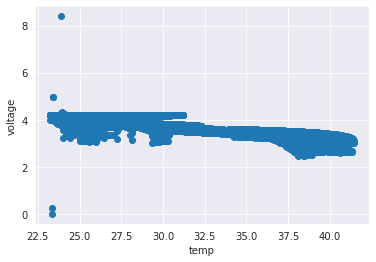

In [19]:
matplotlib.pyplot.scatter(corr_data["Temperature_measured"], corr_data["Voltage_measured"])
matplotlib.pyplot.xlabel("temp")
matplotlib.pyplot.ylabel("voltage")
#higher temp -> lower voltage --> is it because the chemical reaction is slower?

Text(0, 0.5, 'temp')

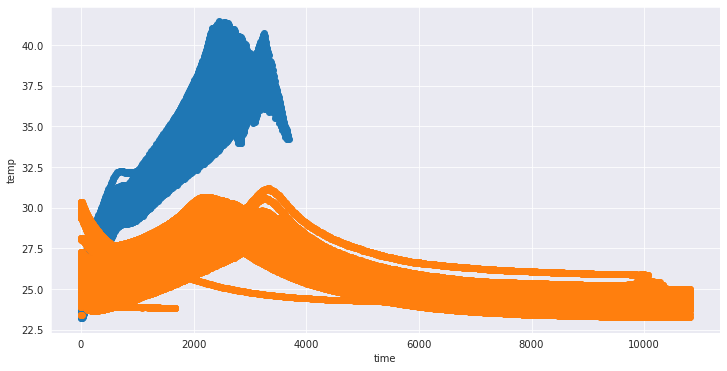

In [41]:
discharge = corr_data[corr_data["type"]==1]
charge = corr_data[corr_data["type"]==0]
matplotlib.pyplot.figure(figsize=(12, 6))
matplotlib.pyplot.scatter(discharge["Time"], discharge["Temperature_measured"], c='#1f77b4') #blue
matplotlib.pyplot.scatter(charge["Time"], charge["Temperature_measured"], c= '#ff7f0e') #orange
matplotlib.pyplot.xlabel("time")
matplotlib.pyplot.ylabel("temp")

Text(0, 0.5, 'temp')

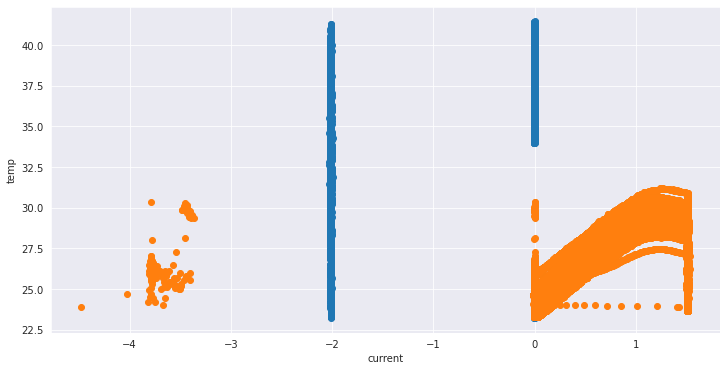

In [42]:
discharge = corr_data[corr_data["type"]==1]
charge = corr_data[corr_data["type"]==0]
matplotlib.pyplot.figure(figsize=(12, 6))
matplotlib.pyplot.scatter(discharge["Current_measured"], discharge["Temperature_measured"], c='#1f77b4') #blue
matplotlib.pyplot.scatter(charge["Current_measured"], charge["Temperature_measured"], c= '#ff7f0e') #orange
matplotlib.pyplot.xlabel("current")
matplotlib.pyplot.ylabel("temp")

Text(0, 0.5, 'current')

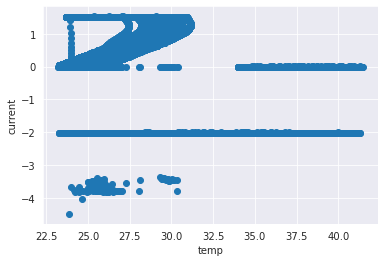

In [21]:
matplotlib.pyplot.scatter(corr_data["Temperature_measured"], corr_data["Current_measured"])
matplotlib.pyplot.xlabel("temp")
matplotlib.pyplot.ylabel("current")


# Random Forest

In [22]:
# train model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [23]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    108221
           1       1.00      1.00      1.00     10071

    accuracy                           1.00    118292
   macro avg       1.00      1.00      1.00    118292
weighted avg       1.00      1.00      1.00    118292



<AxesSubplot:>

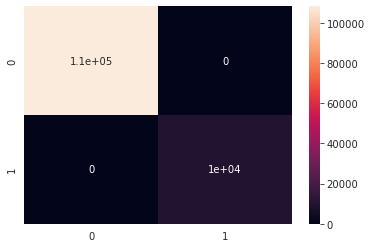

In [24]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True)

### Interpretation of the data and the classfier

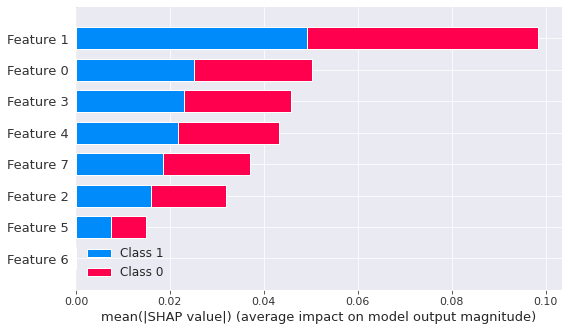

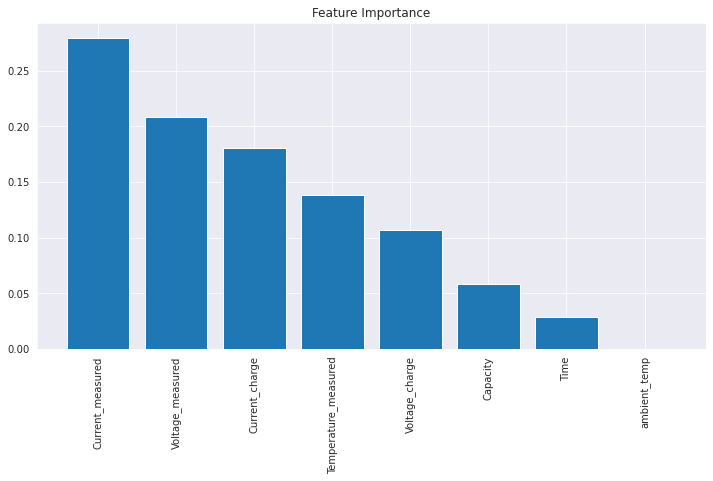

In [25]:
# check feature importance using SHAP
import numpy as np
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# plot feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

In [26]:
# use PCA to reduce dimensionality and plot
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

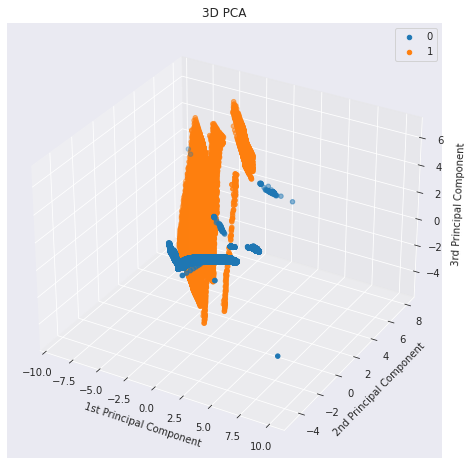

In [27]:
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
ax = plt.subplot(111, projection='3d')  # Create a 3D subplot

# Plot the PCA
# Assuming you have a 'y_train' array for labels to color the points
# If you don't have labels, you can just use one color for all points
for label in np.unique(y_train):
    ax.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], X_train_pca[y_train == label, 2], label=label)

plt.title("3D PCA")
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
ax.set_zlabel("3rd Principal Component")
plt.legend()
plt.show()

# Additional: SVM Classifier

## Linear Kernel

In [28]:
# create the model (SVM with linear kernel)
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# fit and test the model
model = LinearSVC(random_state=0, tol=1e-5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

Liblinear failed to converge, increase the number of iterations.


0.9994420586345654

In [29]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    108221
           1       1.00      1.00      1.00     10071

    accuracy                           1.00    118292
   macro avg       1.00      1.00      1.00    118292
weighted avg       1.00      1.00      1.00    118292



<AxesSubplot:>

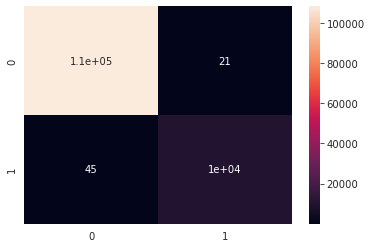

In [30]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True)

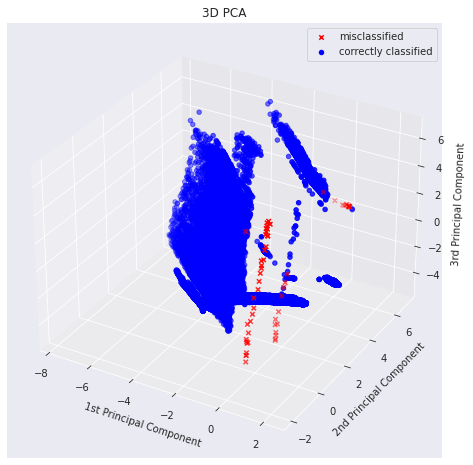

In [31]:
# PCA to reduce dimensionality and plot misclassified vs correctly classified samples
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# get indices of misclassified samples
misclassified_idx = np.where(y_test != y_pred)[0]
correctly_classified_idx = np.where(y_test == y_pred)[0]

plt.figure(figsize=(12, 8))  # Adjust figure size if needed
ax = plt.subplot(111, projection='3d')  # Create a 3D subplot

# Plot the PCA
# Assuming you have a 'y_train' array for labels to color the points
# If you don't have labels, you can just use one color for all points
# for label in np.unique(y_train):
#     ax.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 2], X_train_pca[y_train == label, 1], label=label)
    
# plot misclassified samples vs correctly classified samples
ax.scatter(X_test_pca[misclassified_idx, 0], X_test_pca[misclassified_idx, 1], X_test_pca[misclassified_idx, 2], c='red', marker='x', label='misclassified')

ax.scatter(X_test_pca[correctly_classified_idx, 0], X_test_pca[correctly_classified_idx, 1], X_test_pca[correctly_classified_idx, 2], c='blue', marker='o', label='correctly classified')

plt.title("3D PCA")
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
ax.set_zlabel("3rd Principal Component")
plt.legend()
plt.show()

**Note:** It is very interesting to see that the misclassified samples (in red) are always along a line or in a batch of other misclassified samples, so there appears to be a clear pattern. Perhaps the misclassified samples are somewhat close to the other class in terms of its features and tuning the hyperparameters and/or engineering additional features might eradicate this issue.

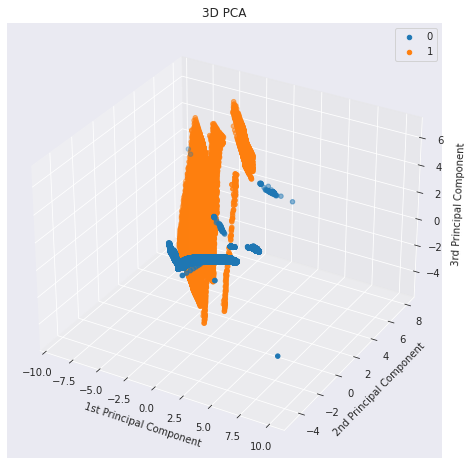

In [32]:
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
ax = plt.subplot(111, projection='3d')  # Create a 3D subplot

# Plot the PCA
# Assuming you have a 'y_train' array for labels to color the points
# If you don't have labels, you can just use one color for all points
for label in np.unique(y_train):
    ax.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], X_train_pca[y_train == label, 2], label=label)
    
plt.title("3D PCA")
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
ax.set_zlabel("3rd Principal Component")
plt.legend()
plt.show()

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


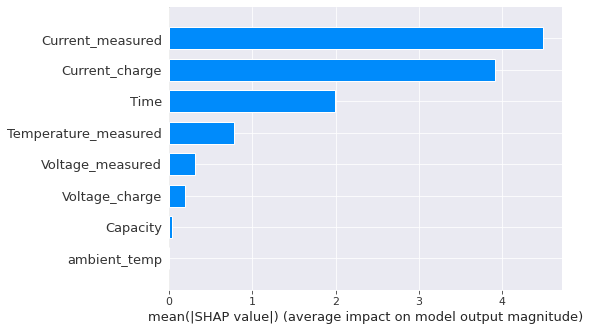

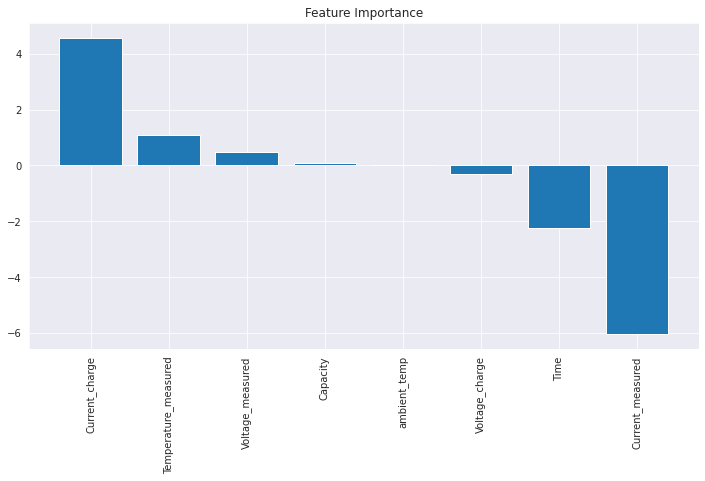

In [33]:
# use SHAP to explain model predictions
import shap
import numpy as np
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=X.columns)

# plot feature importance
importances = model.coef_[0]
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

## RBF Kernel

In [34]:
# create the model (SVM with RBF kernel)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# fit and test the model
model = SVC(kernel='rbf', gamma=0.1, C=1.0, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9998901024583234

In [35]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    108221
           1       1.00      1.00      1.00     10071

    accuracy                           1.00    118292
   macro avg       1.00      1.00      1.00    118292
weighted avg       1.00      1.00      1.00    118292



<AxesSubplot:>

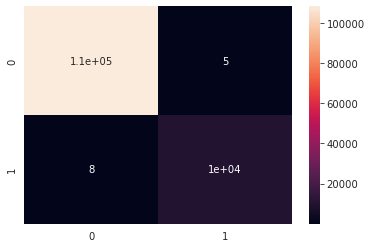

In [36]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True)

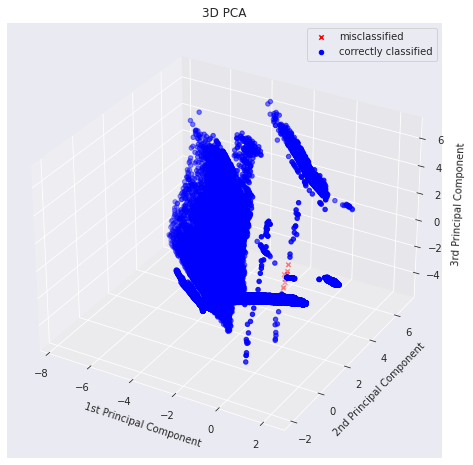

In [37]:
# PCA to reduce dimensionality and plot misclassified vs correctly classified samples
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# get indices of misclassified samples
misclassified_idx = np.where(y_test != y_pred)[0]
correctly_classified_idx = np.where(y_test == y_pred)[0]

plt.figure(figsize=(12, 8))  # Adjust figure size if needed
ax = plt.subplot(111, projection='3d')  # Create a 3D subplot

# Plot the PCA
# Assuming you have a 'y_train' array for labels to color the points
# If you don't have labels, you can just use one color for all points
# for label in np.unique(y_train):
#     ax.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 2], X_train_pca[y_train == label, 1], label=label)
    
# plot misclassified samples vs correctly classified samples
ax.scatter(X_test_pca[misclassified_idx, 0], X_test_pca[misclassified_idx, 1], X_test_pca[misclassified_idx, 2], c='red', marker='x', label='misclassified')

ax.scatter(X_test_pca[correctly_classified_idx, 0], X_test_pca[correctly_classified_idx, 1], X_test_pca[correctly_classified_idx, 2], c='blue', marker='o', label='correctly classified')

plt.title("3D PCA")
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
ax.set_zlabel("3rd Principal Component")
plt.legend()
plt.show()

**Note:** The comparison between the two different SVM classifiers (linear and RBF kernel) clearly illustrates the advantages of having a non-linear kernel when trying to fit a more complex function. This might however not always hold true, since for simpler classification problems a linear kernel will have its advantages in terms of inference speed (less parameters).

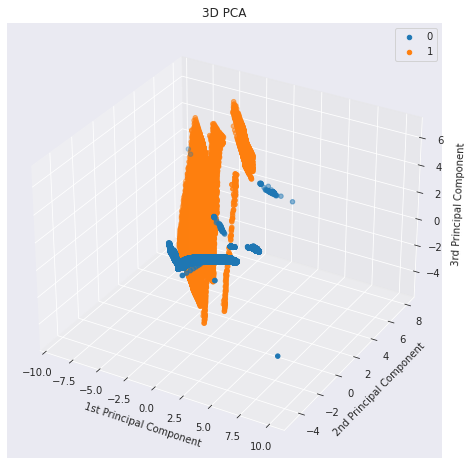

In [38]:
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
ax = plt.subplot(111, projection='3d')  # Create a 3D subplot

# Plot the PCA
# Assuming you have a 'y_train' array for labels to color the points
# If you don't have labels, you can just use one color for all points
for label in np.unique(y_train):
    ax.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], X_train_pca[y_train == label, 2], label=label)
    
plt.title("3D PCA")
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
ax.set_zlabel("3rd Principal Component")
plt.legend()
plt.show()

Using 473166 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


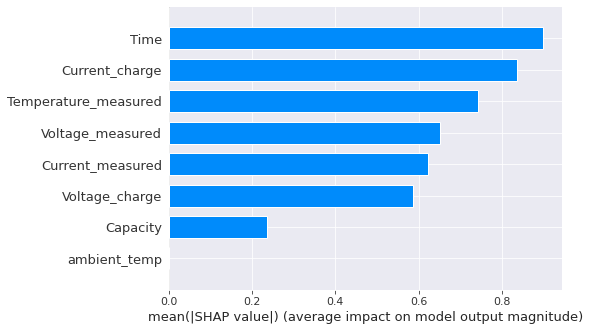

In [39]:
# use SHAP to explain model predictions
import shap
import numpy as np
explainer = shap.KernelExplainer(model.predict, X_train)
# use shap.sample
shap_values = shap.sample(X_train, 100)
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=X.columns)

# Reflections
In conclusion, while this study did not prove to be a huge challenge in terms of its classification problem, it was very interesting to see how the two different classifiers performed. The Random Forest Classifier was able to achieve a 100% accuracy on the test set, while the SVM classifier was not able to achieve this. This might be due to the fact that the SVM classifier is more sensitive to the hyperparameters and the data preprocessing. It would be interesting to see how the SVM classifier would perform if we would tune the hyperparameters more carefully and engineer additional features.
Further, it proved valuable to interpret and analyze the results by using SHAP values and PCA for dimensional reduction. First of all, the SHAP values clearly indicate that the RF classifier prioritizes different features than the SVM classifier. Even the different variants of SVM had different feature importances, which is important to consider when approaching a Machine Learning problem. Further, the PCA analysis showed that there is a clear pattern in terms of the missclassifications SVM classifier, whereby the missclassified samples are always along a line or in a batch of other missclassified samples. The RF classifier did not show this misconception, which demonstrates the versatility of tree-based models, especially when it comes to tabular data and non-linear relationships.